In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


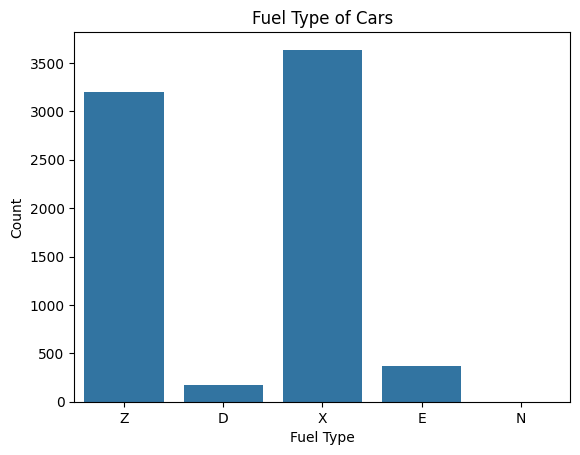

In [7]:
sns.countplot(data=df, x='Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type of Cars')
plt.show()


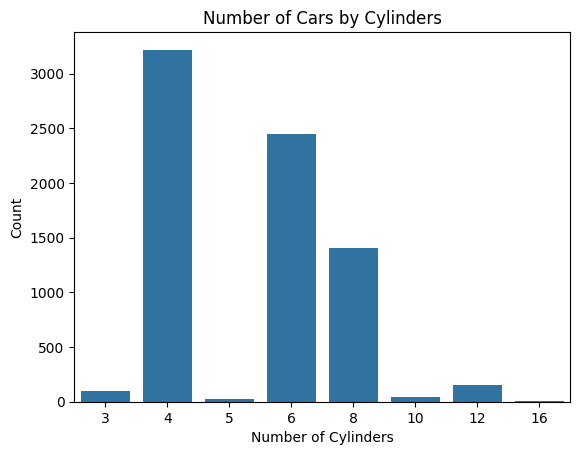

In [8]:
sns.countplot(data=df, x='Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.title('Number of Cars by Cylinders')
plt.show()


In [9]:
df['Engine Size(L)'].unique().sum()

208.4

(array([ 112.,  630., 1875., 2083., 1541.,  747.,  276.,   86.,   27.,
           8.]),
 array([ 96. , 138.6, 181.2, 223.8, 266.4, 309. , 351.6, 394.2, 436.8,
        479.4, 522. ]),
 <BarContainer object of 10 artists>)

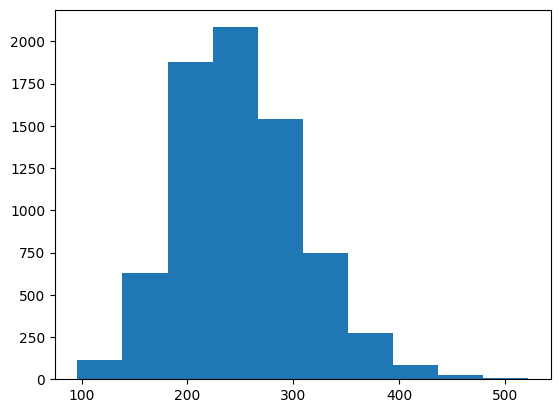

In [10]:
plt.hist(df['CO2 Emissions(g/km)'])

(array([ 150., 1187., 2432., 1881., 1058.,  416.,  200.,   42.,   11.,
           8.]),
 array([ 4.2 ,  6.84,  9.48, 12.12, 14.76, 17.4 , 20.04, 22.68, 25.32,
        27.96, 30.6 ]),
 <BarContainer object of 10 artists>)

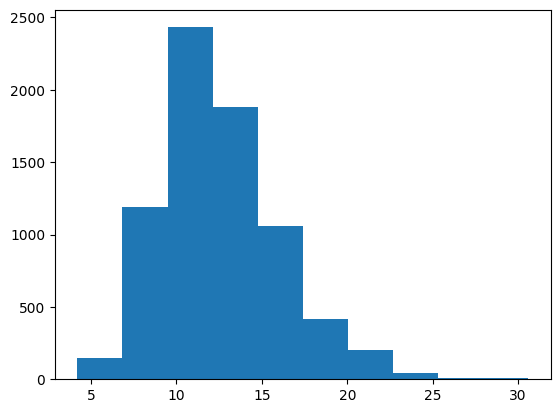

In [11]:
plt.hist(df['Fuel Consumption City (L/100 km)'])

In [12]:
df.drop('Fuel Consumption Comb (mpg)', axis=1, inplace=True)
#Having different units for the same variable can be confusing and can lead to errors in the analysis.
#so we dropped the column 'Fuel Consumption Comb (mpg)'.


In [13]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


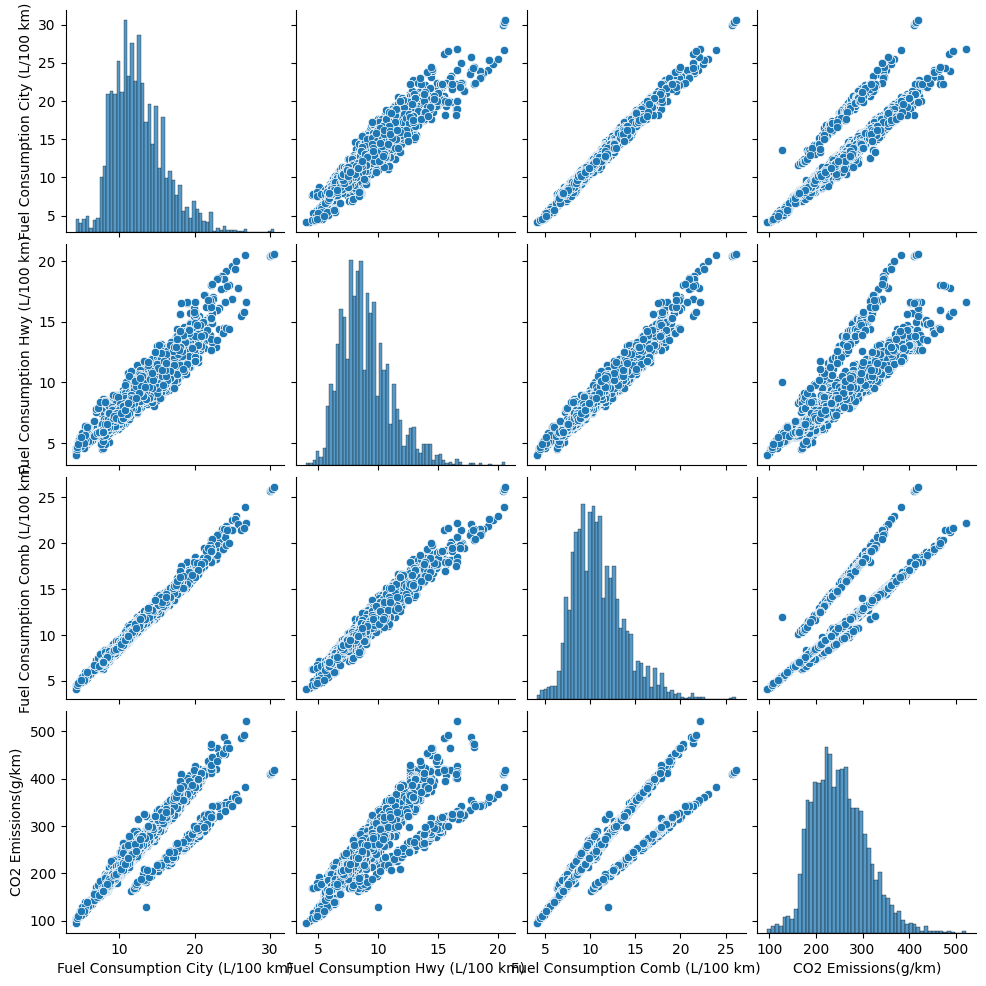

In [14]:
sns.pairplot(data=df, vars=['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)'])
plt.show()


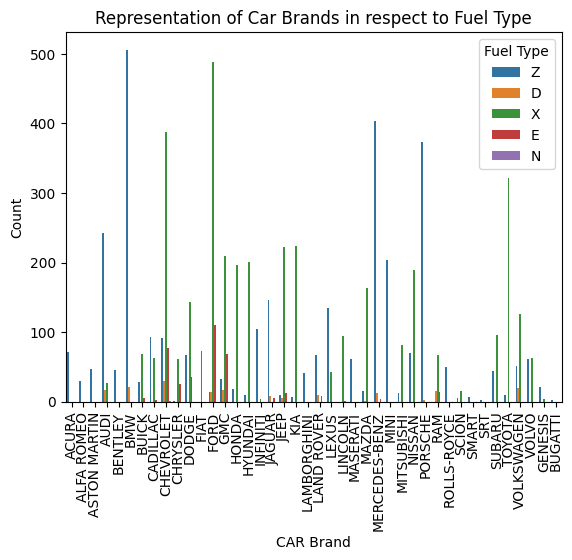

In [17]:
sns.countplot(data=df, x='Make', hue='Fuel Type')
plt.xlabel('CAR Brand')
plt.ylabel('Count')
plt.title('Representation of Car Brands in respect to Fuel Type')
plt.xticks(rotation=90)
plt.show()
#analyzing the fuel type of cars by make.
#this shows fuel type is also a categorical variable which helps to clssfify the cars by make.


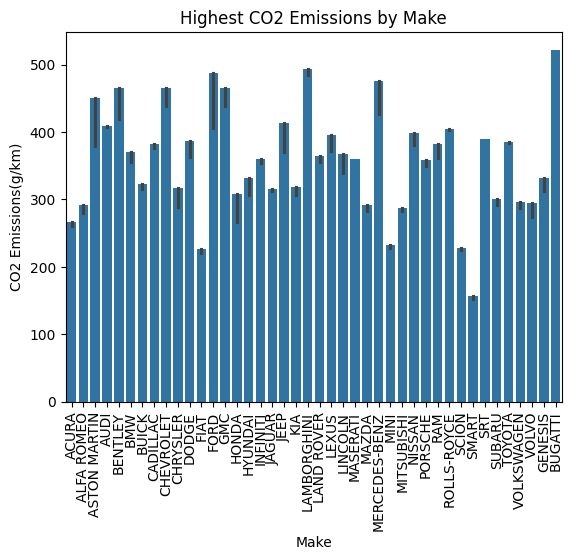

In [17]:
sns.barplot(data=df, x='Make', y='CO2 Emissions(g/km)', estimator=max)
plt.xlabel('Make')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Highest CO2 Emissions by Make')
plt.xticks(rotation=90)
plt.show()
#this shows the highest CO2 emissions by make.
#this helps to identify the make of cars with highest CO2 emissions.


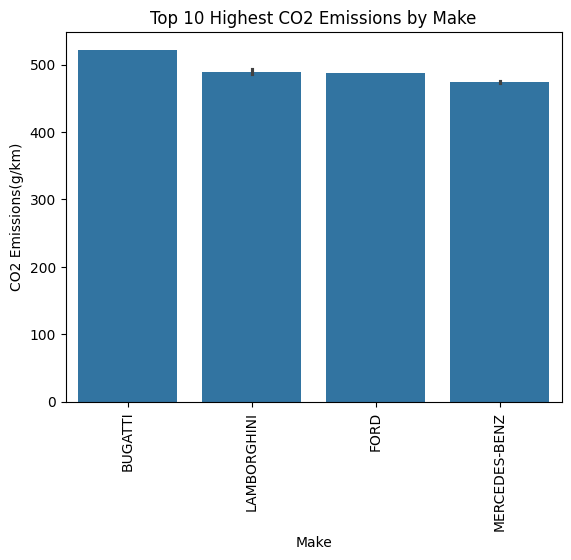

In [18]:
top_10_emissions = df.nlargest(10, 'CO2 Emissions(g/km)')
sns.barplot(data=top_10_emissions, x='Make', y='CO2 Emissions(g/km)')
plt.xlabel('Make')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Top 10 Highest CO2 Emissions by Make')
plt.xticks(rotation=90)
plt.show()
#this shows the top 10 highest CO2 emissions by make.


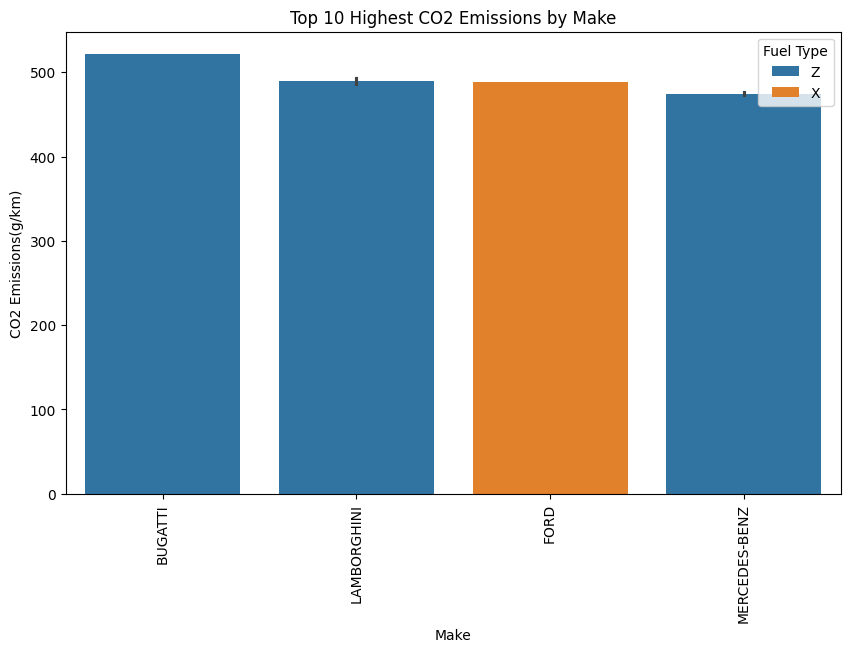

,Make,Fuel Type
4509,BUGATTI,Z
5575,BUGATTI,Z
6640,BUGATTI,Z
6046,LAMBORGHINI,Z
7059,LAMBORGHINI,Z
349,FORD,X
6045,LAMBORGHINI,Z
7058,LAMBORGHINI,Z
2971,MERCEDES-BENZ,Z
5126,MERCEDES-BENZ,Z


In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_emissions, x='Make', y='CO2 Emissions(g/km)', hue='Fuel Type')
plt.xlabel('Make')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Top 10 Highest CO2 Emissions by Make')
plt.xticks(rotation=90)
plt.legend(title='Fuel Type')
plt.show()
top_10_emissions[['Make', 'Fuel Type']].head(10)
#this shows the top 10 highest CO2 emissions by make and fuel type.
#this helps to identify the make of cars with highest CO2 emissions and their fuel type.


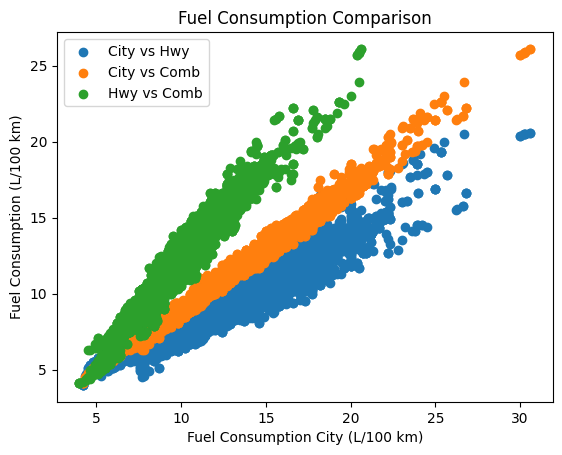

In [20]:
plt.scatter(df['Fuel Consumption City (L/100 km)'], df['Fuel Consumption Hwy (L/100 km)'], label='City vs Hwy')
plt.scatter(df['Fuel Consumption City (L/100 km)'], df['Fuel Consumption Comb (L/100 km)'], label='City vs Comb')
plt.scatter(df['Fuel Consumption Hwy (L/100 km)'], df['Fuel Consumption Comb (L/100 km)'], label='Hwy vs Comb')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.title('Fuel Consumption Comparison')
plt.legend()
plt.show()
#this shows the comparison of fuel consumption by city, highway and combined.
#this helps to identify the fuel consumption by city, highway and combined.
#this also helps to identify the relationship between fuel consumption by city, highway and combined.
#this also helps to identify the outliers.


In [21]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

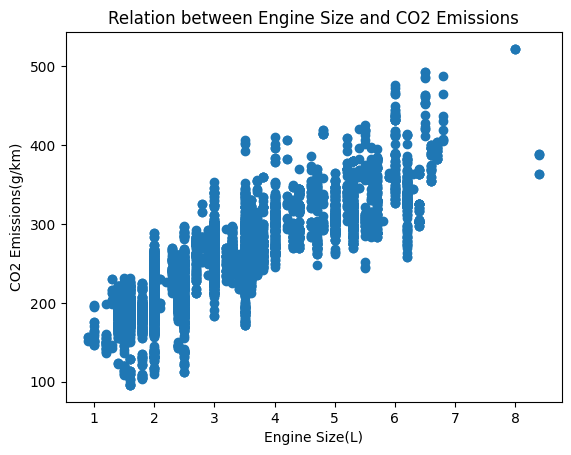

In [22]:
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Engine Size and CO2 Emissions')
plt.show()
#this shows the relationship between engine size and CO2 emissions.
#this helps to identify the relationship between engine size and CO2 emissions.
#this also helps to identify the outliers.

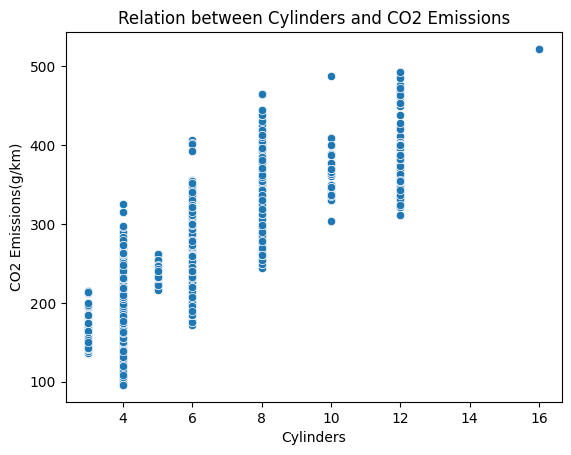

In [23]:
sns.scatterplot(data=df, x='Cylinders', y='CO2 Emissions(g/km)')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Cylinders and CO2 Emissions')
plt.show()
#this shows the relationship between cylinders and CO2 emissions.
#this helps to identify the relationship between cylinders and CO2 emissions.
#this also helps to identify the outliers.


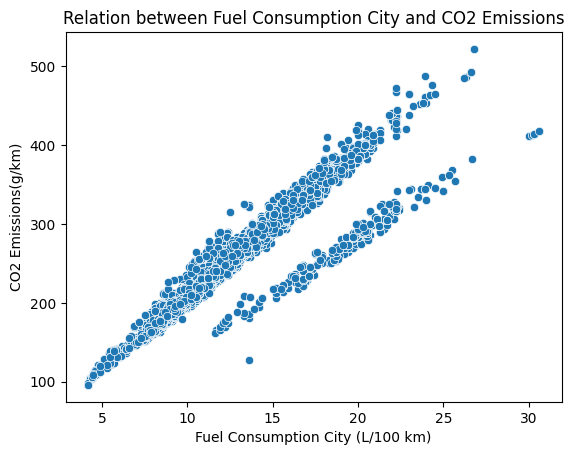

In [24]:
sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Fuel Consumption City and CO2 Emissions')
plt.show()
#this shows the relationship between fuel consumption city and CO2 emissions.
#this helps to identify the relationship between fuel consumption city and CO2 emissions.
#this also helps to identify the outliers.


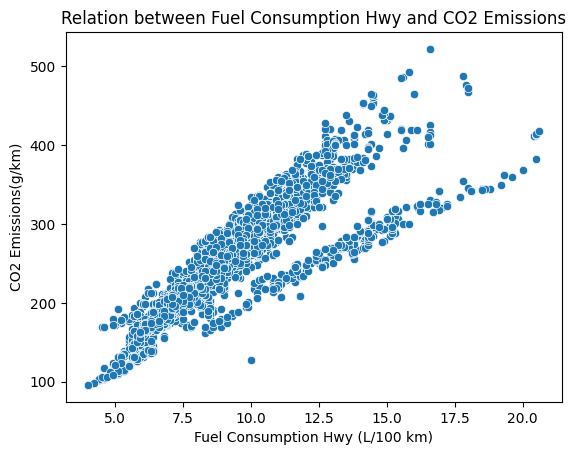

In [25]:
sns.scatterplot(data=df, x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Fuel Consumption Hwy and CO2 Emissions')
plt.show()
#this shows the relationship between fuel consumption highway and CO2 emissions.
#this helps to identify the relationship between fuel consumption highway and CO2 emissions.
#this also helps to identify the outliers.

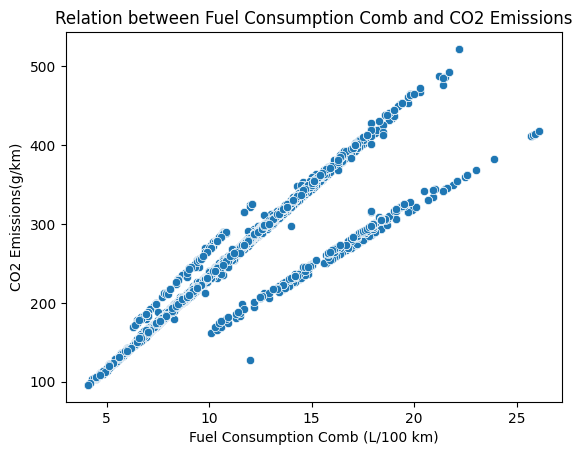

In [26]:
sns.scatterplot(data=df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Fuel Consumption Comb and CO2 Emissions')
plt.show()
#this shows the relationship between fuel consumption combined and CO2 emissions.
#this helps to identify the relationship between fuel consumption combined and CO2 emissions.
#this also helps to identify the outliers.


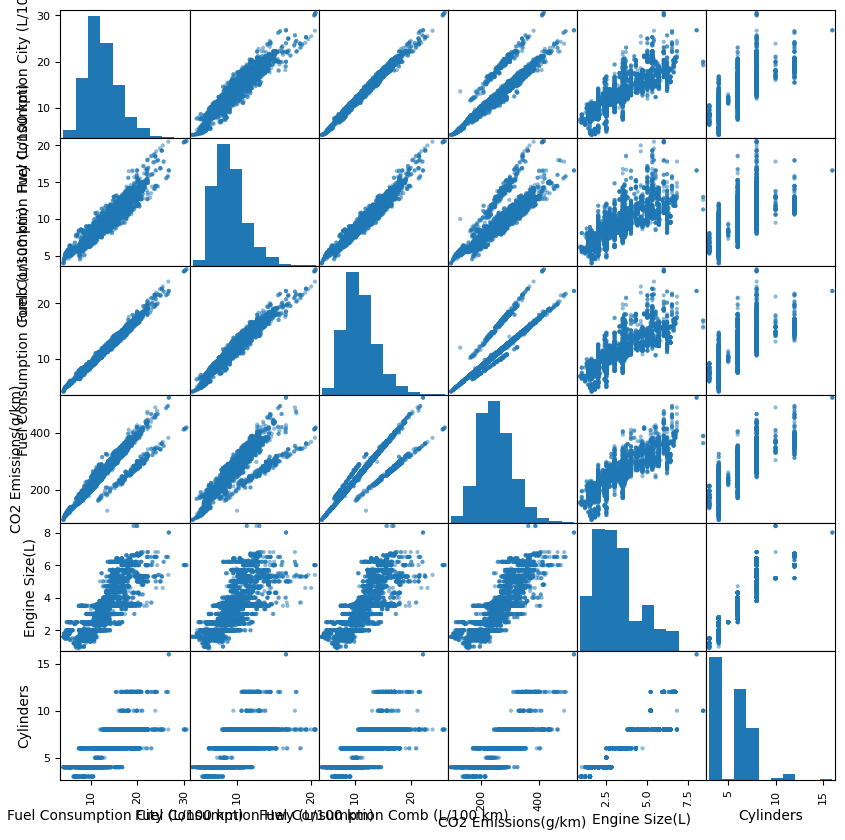

In [27]:
from pandas.plotting import scatter_matrix

variables = ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', 'Engine Size(L)', 'Cylinders']
scatter_matrix(df[variables], figsize=(10, 10))
plt.show()
#this shows the relationship between fuel consumption city, highway, combined, CO2 emissions, engine size and cylinders.


Text(0.5, 1.0, 'Outliers representation')

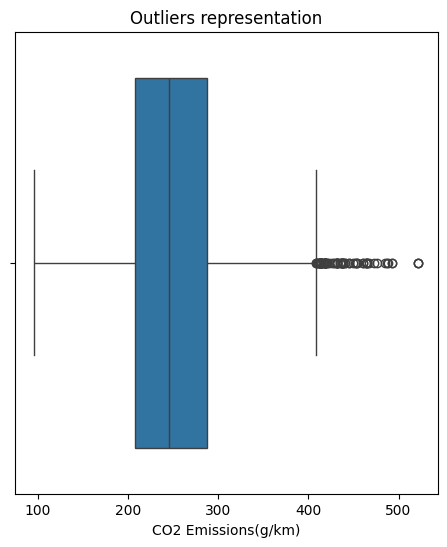

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
sns.boxplot(x = df['CO2 Emissions(g/km)'])
plt.title('Outliers representation')
#this shows the outliers in CO2 emissions.

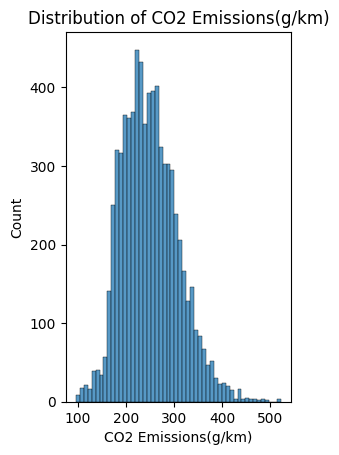

In [29]:
# histplot for normal distribution of the CO2 values
plt.subplot(1, 2, 2)
sns.histplot(x = df['CO2 Emissions(g/km)'])
plt.title('Distribution of CO2 Emissions(g/km)')
plt.show()
#this shows the distribution of CO2 emissions.
#this helps to identify the outliers in CO2 emissions.

In [30]:
from scipy import stats

z_scores = stats.zscore(df['CO2 Emissions(g/km)'])
# select rows where absolute Z-score is less than 2.6
df= df[abs(z_scores) < 2.6]
print('Number of rows before removing outliers:', df.shape[0])
print(z_scores)
#this shows the number of rows before removing outliers.
#this also shows the z-scores of CO2 emissions.
#this helps to identify the outliers in CO2 emissions.

Number of rows before removing outliers: 7289
0      -0.932933
1      -0.505646
2      -1.958421
3       0.075464
4      -0.112542
          ...   
7380   -0.539829
7381   -0.317640
7382   -0.180908
7383   -0.317640
7384   -0.044176
Name: CO2 Emissions(g/km), Length: 7385, dtype: float64


In [31]:
print((z_scores).mean())

-1.2988932881193436e-16


<Axes: xlabel='CO2 Emissions(g/km)'>

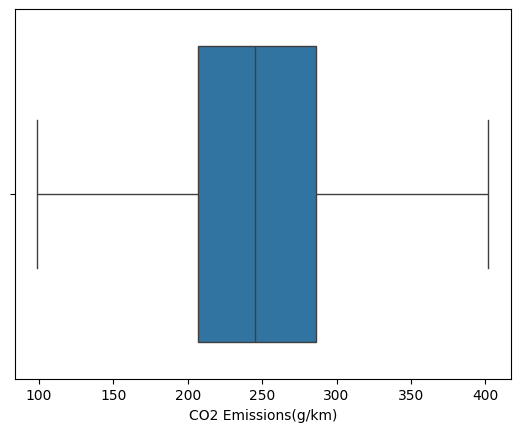

In [32]:
sns.boxplot(x = df['CO2 Emissions(g/km)'])
#removed outliers less than 2.6 z-score
#this shows the outliers in CO2 emissions after removing the outliers.
#this boxplot shows the outliers in CO2 emissions after removing the outliers.

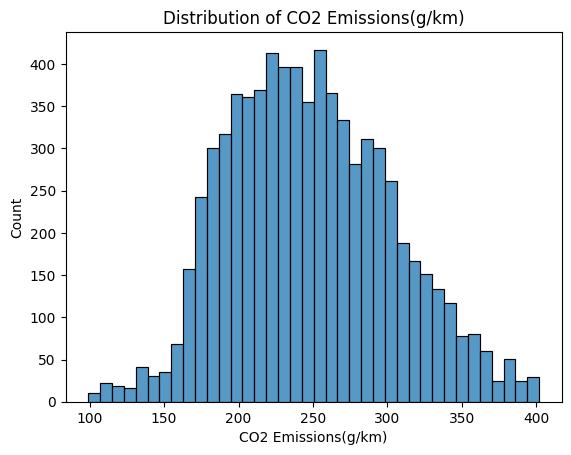

In [33]:
sns.histplot(x = df['CO2 Emissions(g/km)'])
plt.title('Distribution of CO2 Emissions(g/km)')
plt.show()
#removed outliers less than 2.6 z-score and plotting the density garph

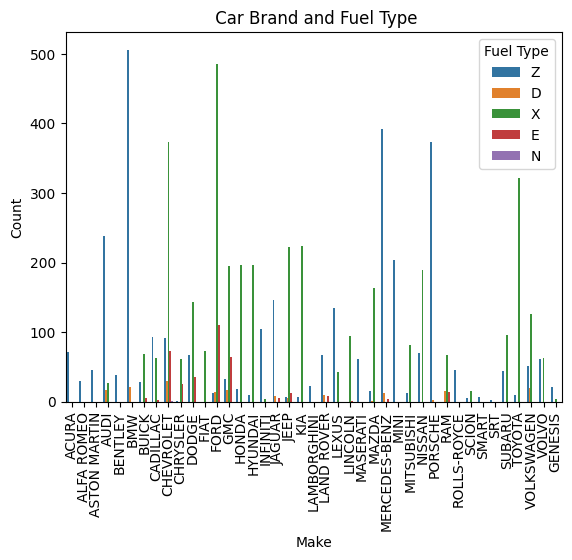

In [34]:
sns.countplot(data=df, x='Make', hue='Fuel Type')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title(' Car Brand and Fuel Type')
plt.xticks(rotation=90)
plt.show()
#these visualizations help to identify the outliers in CO2 emissions.
#After remoiving the outliers, the distribution of CO2 emissions is more normal.

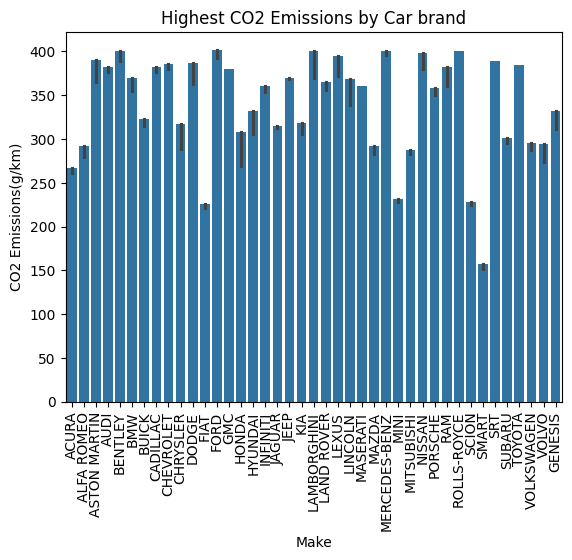

In [35]:
sns.barplot(data=df, x='Make', y='CO2 Emissions(g/km)', estimator=max)
plt.xlabel('Make')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Highest CO2 Emissions by Car brand')
plt.xticks(rotation=90)
plt.show()


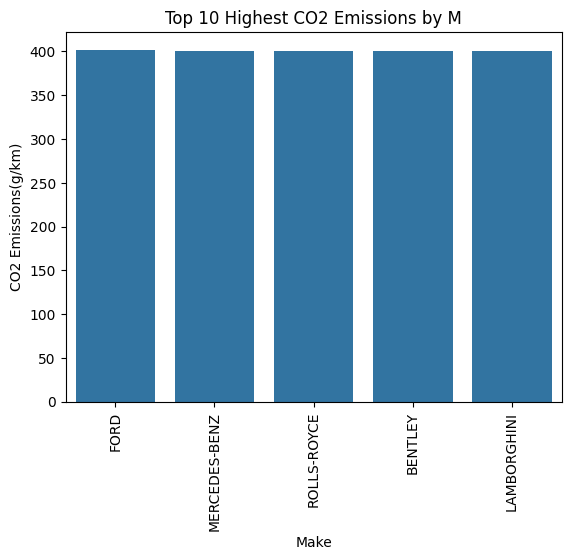

In [36]:
top_10_emissions = df.nlargest(10, 'CO2 Emissions(g/km)')
sns.barplot(data=top_10_emissions, x='Make', y='CO2 Emissions(g/km)')
plt.xlabel('Make')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Top 10 Highest CO2 Emissions by M')
plt.xticks(rotation=90)
plt.show()
#we can say here some Car brands are producing more CO2 emissions than others.
#Outliers are removed from the dataset.

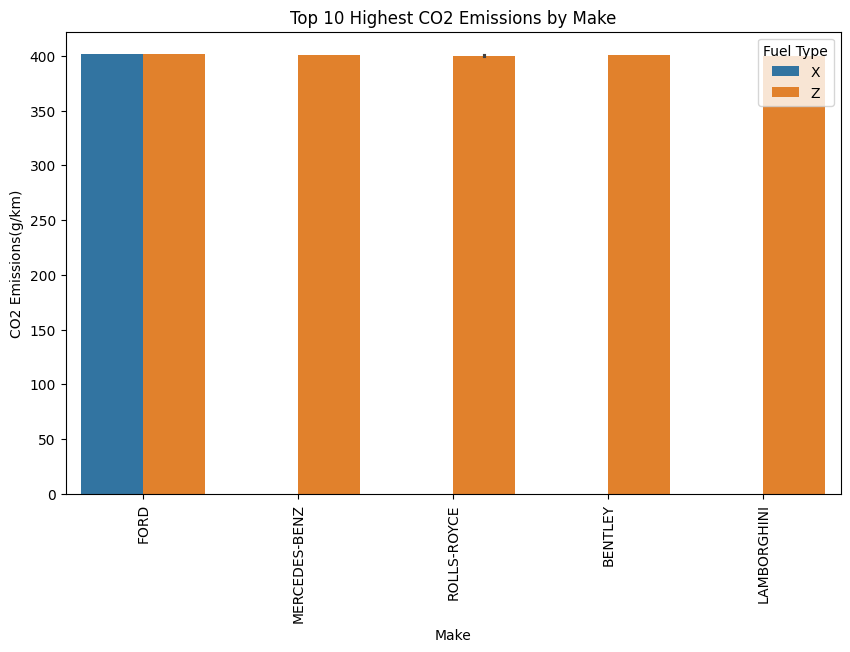

,Make,Fuel Type
374,FORD,X
5799,FORD,Z
3002,MERCEDES-BENZ,Z
4081,MERCEDES-BENZ,Z
4253,ROLLS-ROYCE,Z
6560,BENTLEY,Z
639,LAMBORGHINI,Z
4250,ROLLS-ROYCE,Z
4251,ROLLS-ROYCE,Z
4252,ROLLS-ROYCE,Z


In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_emissions, x='Make', y='CO2 Emissions(g/km)', hue='Fuel Type')
plt.xlabel('Make')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Top 10 Highest CO2 Emissions by Make')
plt.xticks(rotation=90)
plt.legend(title='Fuel Type')
plt.show()
top_10_emissions[['Make', 'Fuel Type']].head(10)

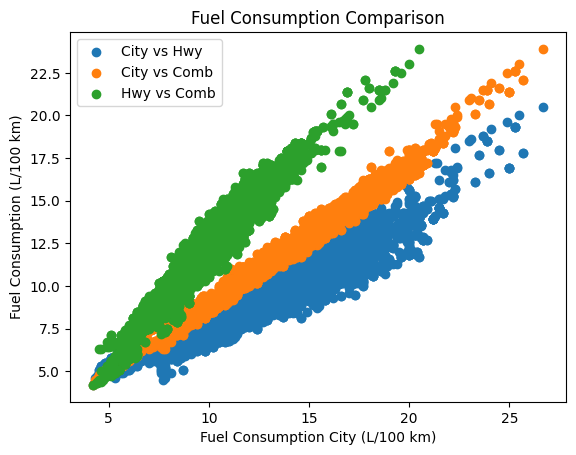

In [38]:
plt.scatter(df['Fuel Consumption City (L/100 km)'], df['Fuel Consumption Hwy (L/100 km)'], label='City vs Hwy')
plt.scatter(df['Fuel Consumption City (L/100 km)'], df['Fuel Consumption Comb (L/100 km)'], label='City vs Comb')
plt.scatter(df['Fuel Consumption Hwy (L/100 km)'], df['Fuel Consumption Comb (L/100 km)'], label='Hwy vs Comb')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.title('Fuel Consumption Comparison')
plt.legend()
plt.show()
#this VIsualization shows the comparison of fuel consumption by city, highway and combined after removing the outliers.

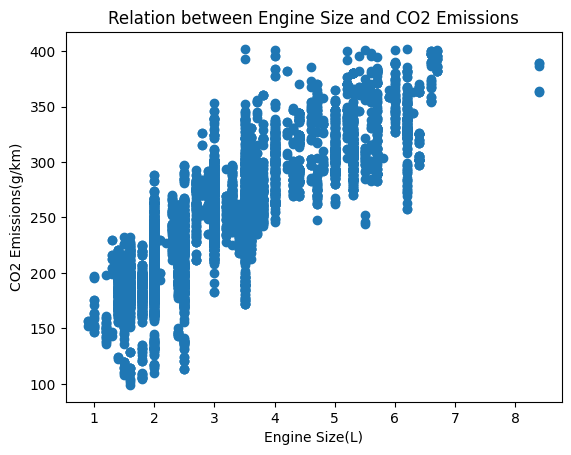

In [39]:
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Engine Size and CO2 Emissions')
plt.show()


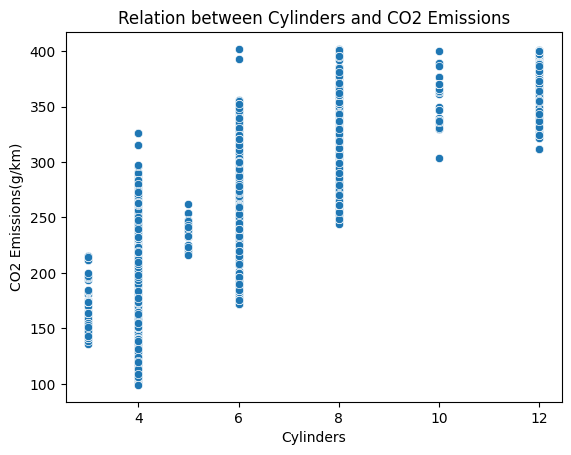

In [40]:
sns.scatterplot(data=df, x='Cylinders', y='CO2 Emissions(g/km)')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Cylinders and CO2 Emissions')
plt.show()

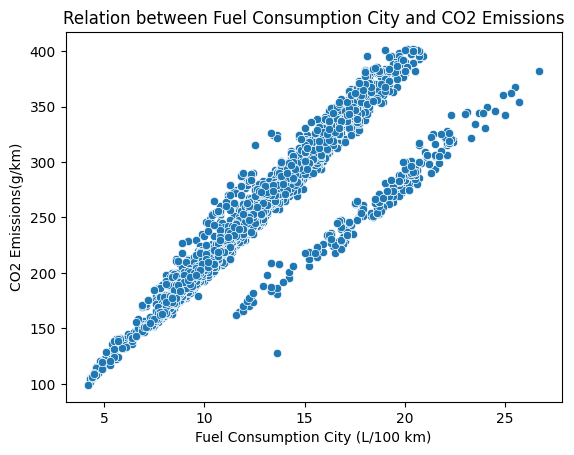

In [41]:
sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Fuel Consumption City and CO2 Emissions')
plt.show()


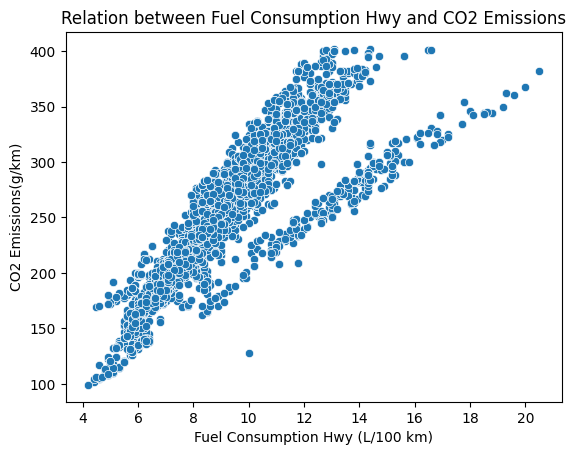

In [42]:
sns.scatterplot(data=df, x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Fuel Consumption Hwy and CO2 Emissions')
plt.show()


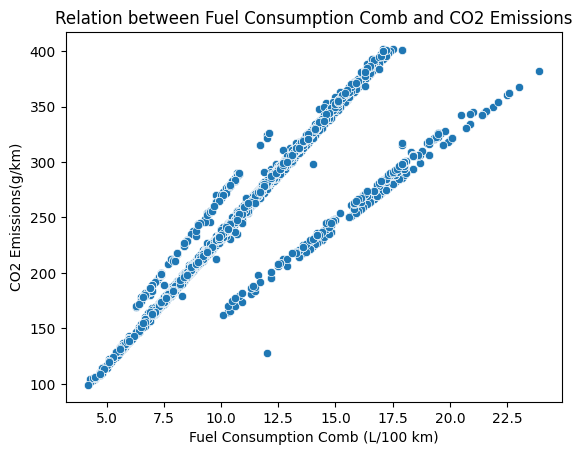

In [43]:
sns.scatterplot(data=df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Fuel Consumption Comb and CO2 Emissions')
plt.show()


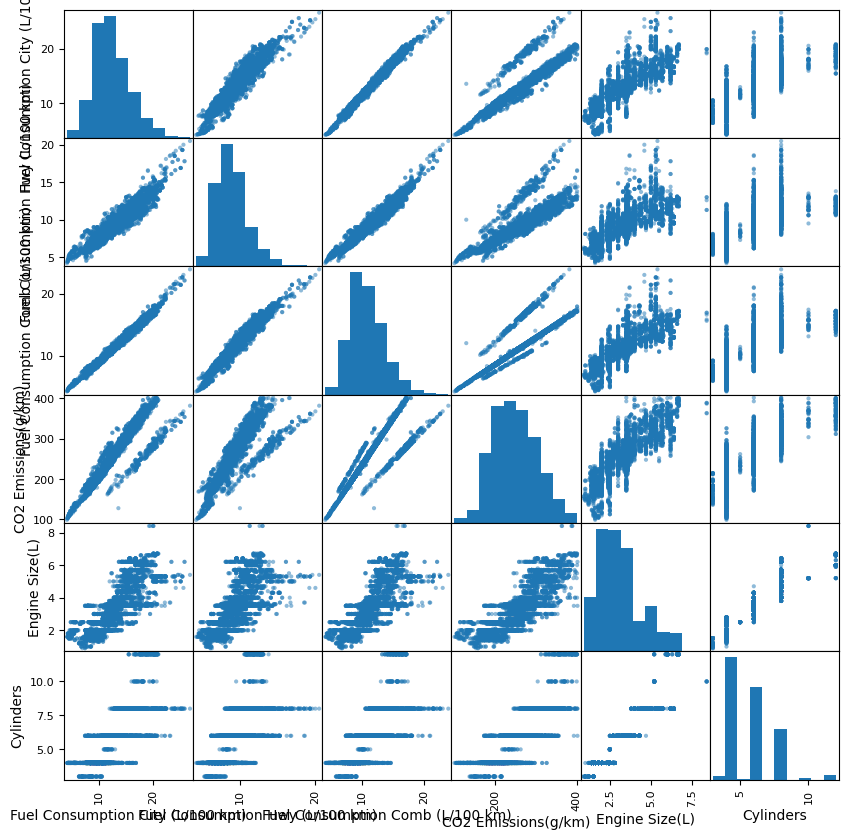

In [44]:
from pandas.plotting import scatter_matrix

variables = ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', 'Engine Size(L)', 'Cylinders']
scatter_matrix(df[variables], figsize=(10, 10))
plt.show()

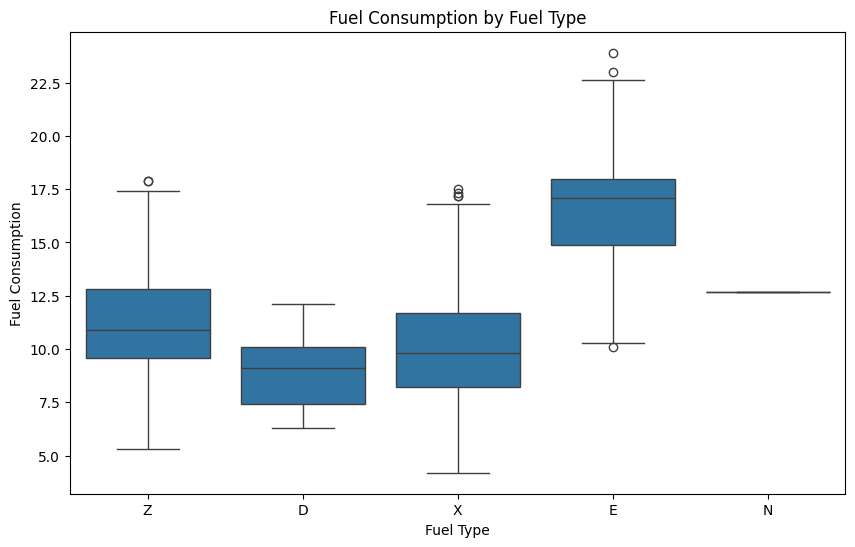

In [45]:
plt.figure(figsize = (10, 6))

# box plot
sns.boxplot(x = 'Fuel Type', y = 'Fuel Consumption Comb (L/100 km)', data = df)
plt.title('Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption')
plt.show()
#this shows the fuel consumption by fuel type.
#To observe the fuel consumption by fuel type, we can use a box plot.


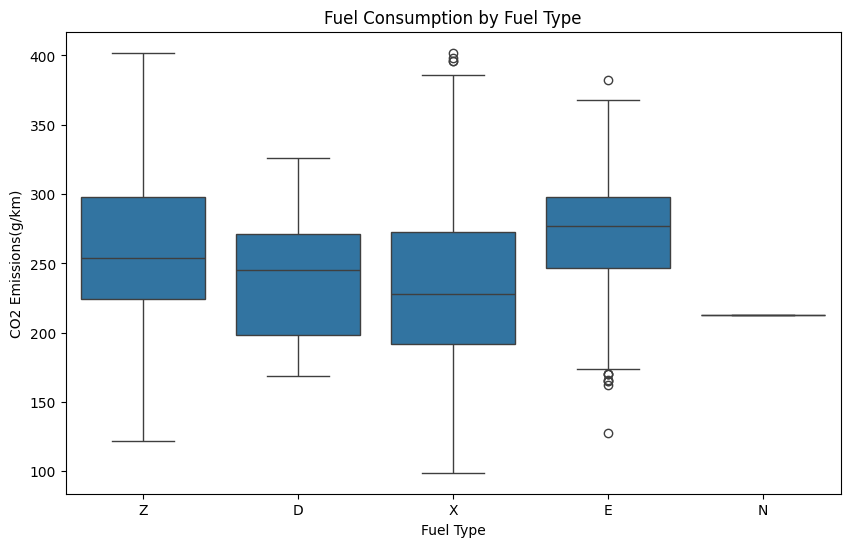

In [46]:
plt.figure(figsize = (10, 6))

# box plot
sns.boxplot(x = 'Fuel Type', y = 'CO2 Emissions(g/km)', data = df)
plt.title('Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

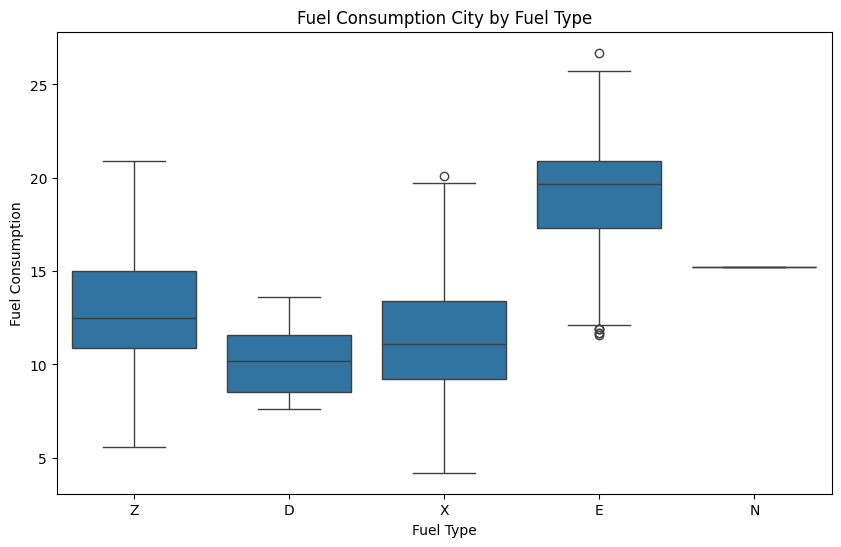

In [47]:
plt.figure(figsize = (10, 6))

# box plot
sns.boxplot(x = 'Fuel Type', y = 'Fuel Consumption City (L/100 km)', data = df)
plt.title('Fuel Consumption City by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption')
plt.show()


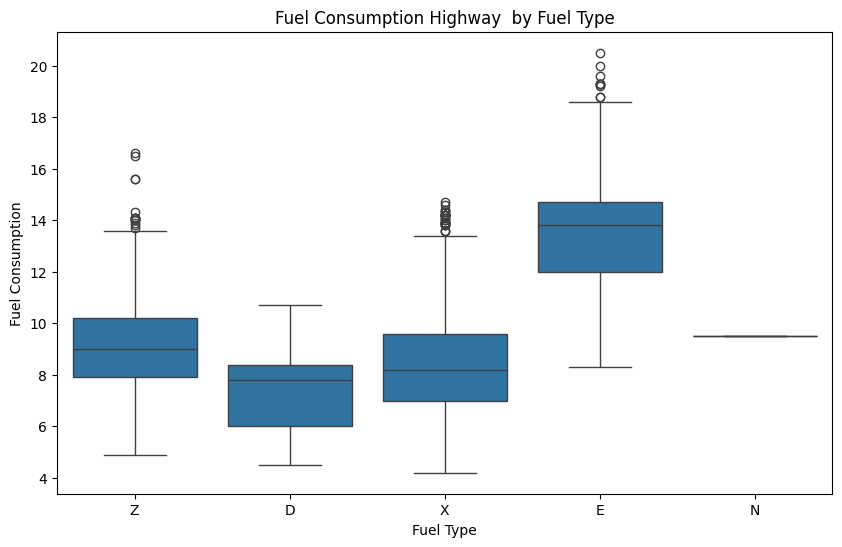

In [48]:
plt.figure(figsize = (10, 6))

# box plot
sns.boxplot(x = 'Fuel Type', y = 'Fuel Consumption Hwy (L/100 km)', data = df)
plt.title('Fuel Consumption Highway  by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption')
plt.show()


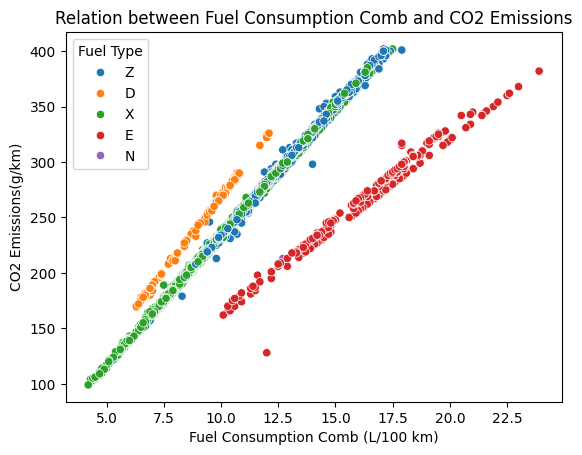

In [49]:
sns.scatterplot(data=df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('Relation between Fuel Consumption Comb and CO2 Emissions')
plt.show()
#this shows the relationship between fuel consumption combined and CO2 emissions by fuel type after removing the outliers.

In [50]:
n_values_count = df['Fuel Type'].value_counts()

# Display the count of 'N' values
print("Number of 'N' values in the 'Fuel Type' column:", n_values_count.get('N', 0))

Number of 'N' values in the 'Fuel Type' column: 1


In [51]:
emissions_with_dummies = df.copy()
emissions_to_dummies = ['Make','Vehicle Class','Cylinders','Transmission','Fuel Type']

# corresponding column prefixes used for one-hot encoding
prefix_for_emissions = ['Make','Cls','Cyl','Trans','F']


# display unique values of categorical columns before encoding
print("Unique values before encoding: ")
for column in emissions_to_dummies:
    print(column, ":", df[column].unique())


# one-hot enc in a loop
for column, pref in zip(emissions_to_dummies, prefix_for_emissions):
    # prefix parameter adds a prefix to the new column names
    # drop_first = True parameter is used to avoid the dummy variable trap by dropping the first dummy variable, to prevent multicollinearity issues
    dummy = pd.get_dummies(emissions_with_dummies[column], prefix = pref, drop_first = True)
    
    # join the encoded columns with the original df
    emissions_with_dummies = emissions_with_dummies.join(dummy)

# assign the target var 
labels = emissions_with_dummies['CO2 Emissions(g/km)']

# columns that will be dropped from the df 
emissions_to_drop = emissions_to_dummies + ['Model', 'CO2 Emissions(g/km)']

print(emissions_to_drop)

Unique values before encoding: 
Make : ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS']
Vehicle Class : ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
Cylinders : [ 4  6 12  8 10  3  5]
Transmission : ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']
Fuel Type : ['Z' 'D' 'X' 'E' 'N']
['Make', 'Vehicle Class', 'C

In [52]:
# drop columns identified in emissions_to_drop
final_emissions = emissions_with_dummies.drop(emissions_to_drop, axis = 1)

# display unique values of categorical columns after encoding
print("\nUnique values after encoding:")
encoded_columns = [col for col in final_emissions.columns if any(col.startswith(prefix) for prefix in emissions_to_dummies)]
for column in encoded_columns:
    print(column, ":", final_emissions[column].unique())



Unique values after encoding:
Make_ALFA ROMEO : [False  True]
Make_ASTON MARTIN : [False  True]
Make_AUDI : [False  True]
Make_BENTLEY : [False  True]
Make_BMW : [False  True]
Make_BUICK : [False  True]
Make_CADILLAC : [False  True]
Make_CHEVROLET : [False  True]
Make_CHRYSLER : [False  True]
Make_DODGE : [False  True]
Make_FIAT : [False  True]
Make_FORD : [False  True]
Make_GENESIS : [False  True]
Make_GMC : [False  True]
Make_HONDA : [False  True]
Make_HYUNDAI : [False  True]
Make_INFINITI : [False  True]
Make_JAGUAR : [False  True]
Make_JEEP : [False  True]
Make_KIA : [False  True]
Make_LAMBORGHINI : [False  True]
Make_LAND ROVER : [False  True]
Make_LEXUS : [False  True]
Make_LINCOLN : [False  True]
Make_MASERATI : [False  True]
Make_MAZDA : [False  True]
Make_MERCEDES-BENZ : [False  True]
Make_MINI : [False  True]
Make_MITSUBISHI : [False  True]
Make_NISSAN : [False  True]
Make_PORSCHE : [False  True]
Make_RAM : [False  True]
Make_ROLLS-ROYCE : [False  True]
Make_SCION : [False  

In [53]:
final_emissions


,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUICK,...,Trans_AV6,Trans_AV7,Trans_AV8,Trans_M5,Trans_M6,Trans_M7,F_E,F_N,F_X,F_Z
0,2.0,9.9,6.7,8.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,11.2,7.7,9.6,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1.5,6.0,5.8,5.9,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3.5,12.7,9.1,11.1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,12.1,8.7,10.6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,10.7,7.7,9.4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7381,2.0,11.2,8.3,9.9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7382,2.0,11.7,8.6,10.3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7383,2.0,11.2,8.3,9.9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(final_emissions, labels, test_size = 0.2, random_state = 42)

lin_reg_enc = LinearRegression().fit(X_train, y_train)
print('The coefficient of determination (R^2) of the prediction, for continuous variables only linear regressions model: ')
print(lin_reg_enc.score(X_test, y_test))

The coefficient of determination (R^2) of the prediction, for continuous variables only linear regressions model: 
0.993111878731153


In [55]:
numerical_columns=df.select_dtypes(exclude=['object']).columns

y = df['CO2 Emissions(g/km)']
X = df[numerical_columns].drop('CO2 Emissions(g/km)',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_test, y_test)


0.8749132011917837

In [56]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.869
Model:                             OLS   Adj. R-squared:                  0.869
Method:                  Least Squares   F-statistic:                     7733.
Date:                 Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                         15:35:41   Log-Likelihood:                -25723.
No. Observations:                 5831   AIC:                         5.146e+04
Df Residuals:                     5825   BIC:                         5.150e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               55.6172      1.348     41.273      0.000      52.976      58.259
Engine Size(L)                       6.0315      0.571     10.571      0.000       4.913       7.150
Cylinders                            6.4520      0.403     15.994      0.000       5.661       7.243
Fuel Consumption City (L/100 km)     0.0568      3.307      0.017      0.986      -6.426       6.540
Fuel Consumption Hwy (L/100 km)      0.8428      2.733      0.308      0.758      -4.515       6.200
Fuel Consumption Comb (L/100 km)    11.9209      5.999      1.987      0.047       0.160      23.682
==============================================================================
Omnibus:                     1613.860   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5081.733
Skew:                          -1.408   Prob(JB):                         0.00
Kurtosis:                       6.604   Cond. No.                         578.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print((lin_reg_enc.coef_).mean())
print(lin_reg_enc.intercept_)

-2.307349383736427
36.54053937450885


In [58]:
print(lin_reg_enc.coef_)
print(lin_reg_enc.intercept_)

[ 3.08073299e-01  5.89398456e+00  4.49422907e+00  1.18692382e+01
  3.65480132e+00  3.94783751e+00  1.97438006e+00  3.47751951e+00
  1.76716894e+00  3.61451863e+00  2.67859865e+00  4.12962276e+00
  7.47848378e+00  5.93490051e+00  3.94170878e+00  5.51675516e+00
  5.33221263e+00  4.25343462e+00  3.20837947e+00  4.14413908e+00
  3.23824152e+00  2.08189899e+00  4.83035952e+00  4.20060677e+00
  2.74247612e+00 -3.43541809e-01  1.84093929e+00  4.26640475e+00
  4.95081430e+00  2.60880286e+00  2.82767572e+00  2.02521224e+00
  2.73057256e+00  4.66953393e+00  2.10788616e+00  4.65881388e+00
  1.61303819e+00  2.26676401e+00 -2.39041477e+00 -4.62975535e-02
  3.59255133e+00  3.18376628e+00  2.50862759e+00  1.75083598e+00
  3.86617819e-01 -7.49144882e-01 -8.74388231e-01 -3.23221732e-01
  3.66698534e+00  8.47475897e-01  2.34851583e+00 -5.36063323e-03
 -2.05252667e-01 -2.46222563e-01  7.79422011e-01  8.99822736e-01
 -3.67927320e-01 -1.71459385e+01 -9.83737891e+00  3.81327613e-01
  6.40467359e-01  1.52936

In [59]:
numerical_columns=df.select_dtypes(exclude=['object']).columns

y = df['CO2 Emissions(g/km)']
X = df[numerical_columns].drop('CO2 Emissions(g/km)',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_test, y_test)


0.8749132011917837

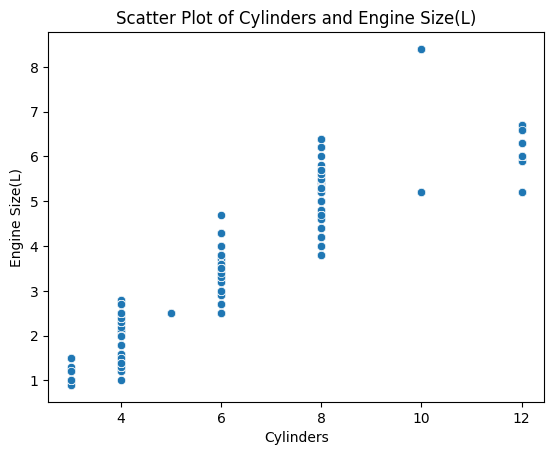

In [60]:
import seaborn as sns

sns.scatterplot(data=df, x='Cylinders', y='Engine Size(L)')
plt.xlabel('Cylinders')
plt.ylabel('Engine Size(L)')
plt.title('Scatter Plot of Cylinders and Engine Size(L)')
plt.show()
